In [31]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

column_names=["x","y","z"]
file_paths=glob.glob("dataset/*.txt")

dfs=[]

for file_path in file_paths:
    df = pd.read_csv(file_path, names=column_names)
    dfs.append(df)

X = pd.concat(dfs, ignore_index=True)



In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   z       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [33]:
X.head()


,x,y,z
0,1.103182,4.705777,0
1,-1.932846,3.642251,2
2,-2.034422,1.866002,2
3,1.616402,2.686831,0
4,-0.960010,4.492566,0


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)
X = pd.DataFrame(normalized_data, columns=X.columns)


In [35]:
X.head()

,x,y,z
0,0.650956,0.809001,0.0
1,0.360491,0.699480,1.0
2,0.350773,0.516563,1.0
3,0.700057,0.601092,0.0
4,0.453565,0.787045,0.0


In [36]:
def plot_clusterized(X,labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X["x"], X["y"], X["z"],
               c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    return ax


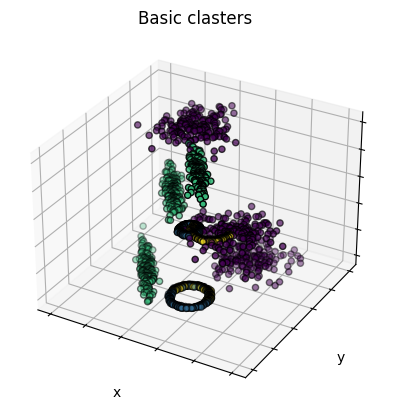

In [37]:
basic_labels=np.array([i//500 for i in range(2000)])
ax=plot_clusterized(X,basic_labels)
ax.set_title(f"Basic clasters")
plt.show()

In [38]:
from sklearn.cluster import KMeans

def k_means(X,n_clusters):

   
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    ax = plot_clusterized(X, labels)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c="RED", edgecolor="k", marker='*',s=500)
    ax.set_title(f"{n_clusters} clusters")
    plt.show()


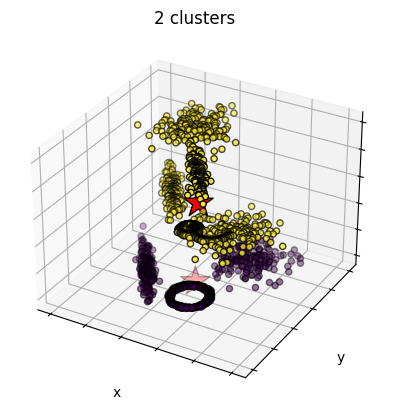

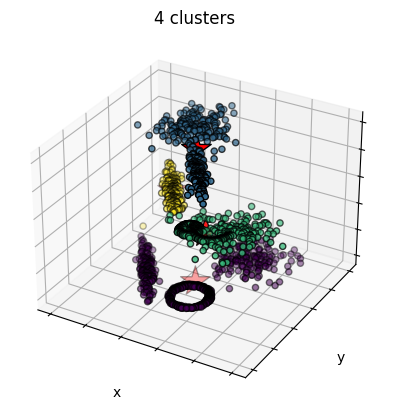

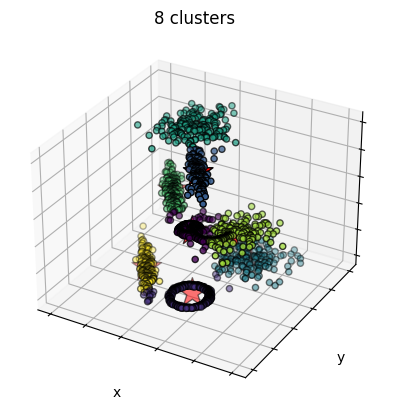

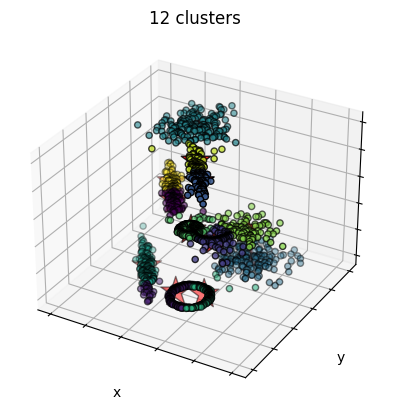

In [39]:
for n in [2,4,8,12]:
    k_means(X,n)



In [40]:
from sklearn.cluster import DBSCAN


def dbscan(X, eps, min_samples):


    dbscan_est = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan_est.fit(X)
    labels = dbscan_est.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(f"Estimated number of clusters: {n_clusters_}")
    print(f"Estimated number of noise points: {n_noise_}")
    ax=plot_clusterized(X, labels)
    ax.set_title(f"DBSCAN eps:{eps}, min_samples:{min_samples}")
    plt.show()


Estimated number of clusters: 4
Estimated number of noise points: 2


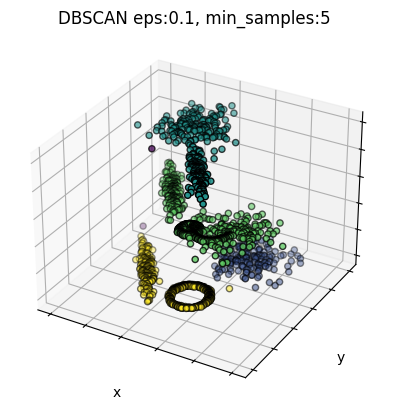

Estimated number of clusters: 4
Estimated number of noise points: 4


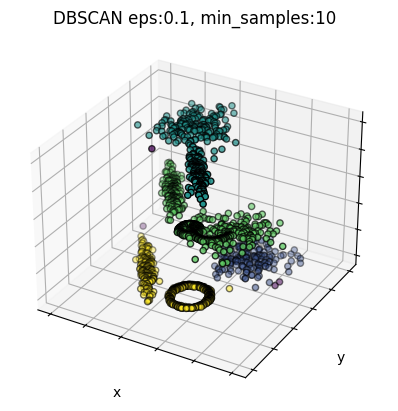

Estimated number of clusters: 4
Estimated number of noise points: 12


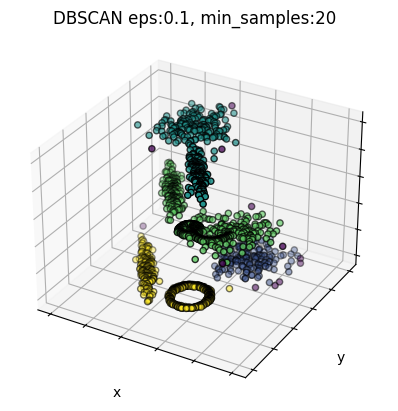

Estimated number of clusters: 5
Estimated number of noise points: 72


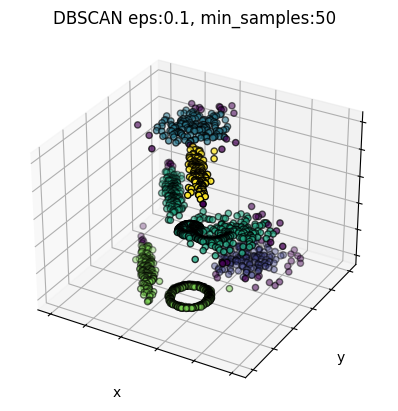

Estimated number of clusters: 3
Estimated number of noise points: 0


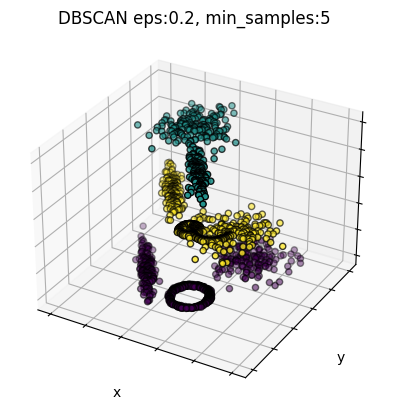

Estimated number of clusters: 3
Estimated number of noise points: 0


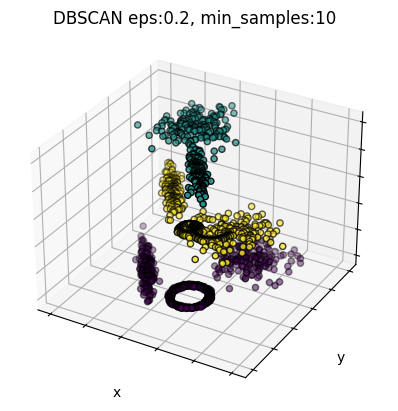

Estimated number of clusters: 3
Estimated number of noise points: 0


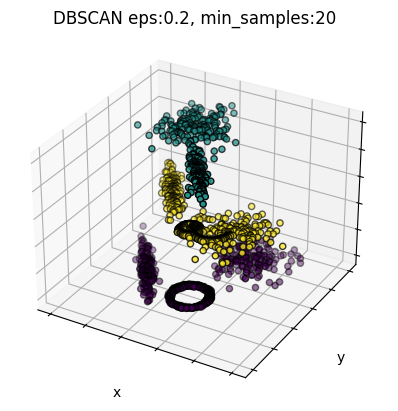

Estimated number of clusters: 3
Estimated number of noise points: 0


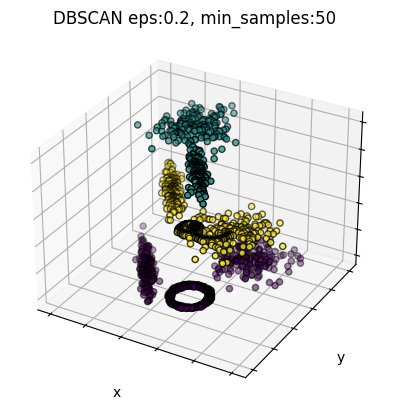

Estimated number of clusters: 3
Estimated number of noise points: 0


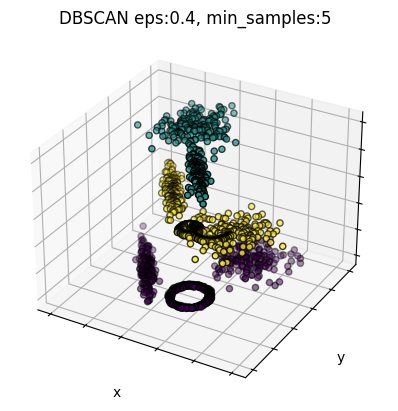

Estimated number of clusters: 3
Estimated number of noise points: 0


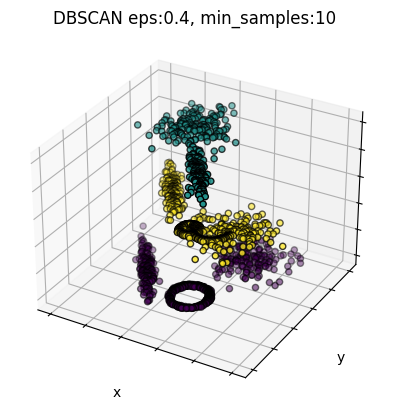

Estimated number of clusters: 3
Estimated number of noise points: 0


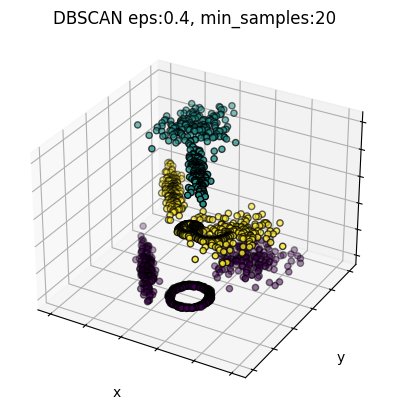

Estimated number of clusters: 3
Estimated number of noise points: 0


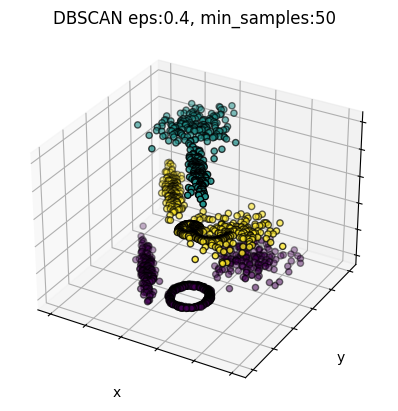

Estimated number of clusters: 3
Estimated number of noise points: 0


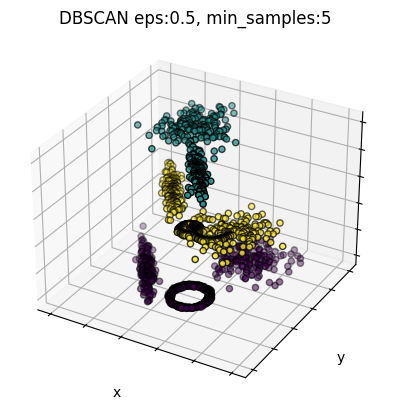

Estimated number of clusters: 3
Estimated number of noise points: 0


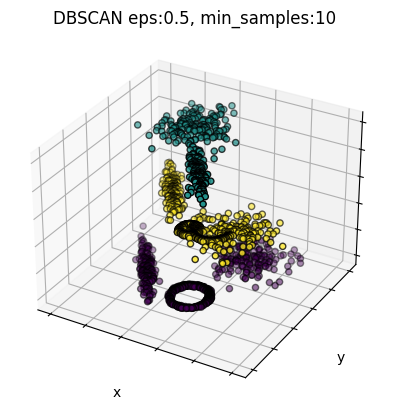

Estimated number of clusters: 3
Estimated number of noise points: 0


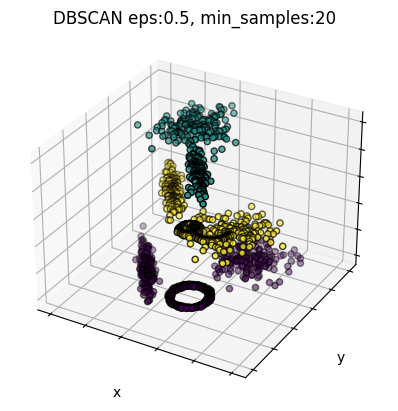

Estimated number of clusters: 3
Estimated number of noise points: 0


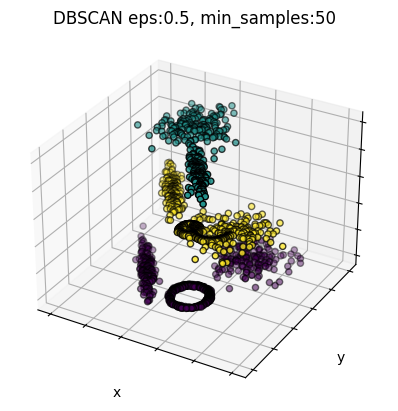

In [41]:
import itertools
for eps,min_samples in list(itertools.product([0.1,0.2,0.4,0.5],[5,10,20,50])):
    dbscan(X,eps,min_samples)

**ZAD 2**

In [55]:
banknotes_column_names = ["Conterfeit",
                          "Length",
                          "Left",
                          "Right",
                          "Bottom",
                          "Top",
                          "Diagonal"]

banknotes_df = pd.read_csv("dataset/banknotes.csv",
                           names=banknotes_column_names)


In [56]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(banknotes_df)
banknotes_df = pd.DataFrame(normalized_data, columns=banknotes_df.columns)


In [57]:
banknotes_df.head()

,Conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0.0,0.40,1.00,1.000000,0.327273,0.434783,0.695652
1,0.0,0.32,0.35,0.333333,0.163636,0.391304,0.847826
2,0.0,0.40,0.35,0.333333,0.272727,0.413043,0.956522
3,0.0,0.40,0.35,0.285714,0.054545,0.586957,0.913043
4,0.0,0.48,0.30,0.333333,0.581818,0.000000,0.869565


In [58]:
banknotes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Conterfeit  200 non-null    float64
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


<BarContainer object of 2 artists>

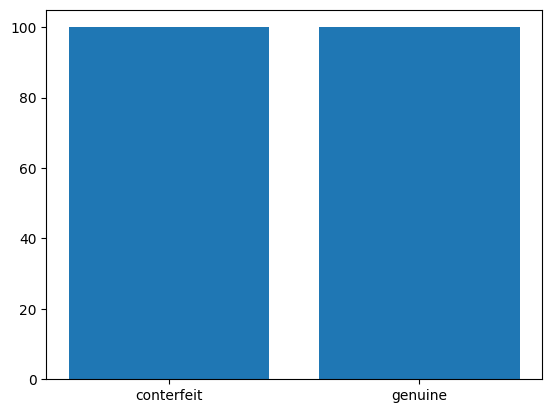

In [59]:
plt.bar(["conterfeit","genuine"],[banknotes_df["Conterfeit"].sum(),banknotes_df.shape[0]-banknotes_df["Conterfeit"].sum()])

In [60]:
banknotes_df=banknotes_df.drop("Conterfeit",axis=1)

In [61]:
def k_means_elbow(X):
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squares of the distances within the clusters')
    plt.title('Elbow')
    plt.show()


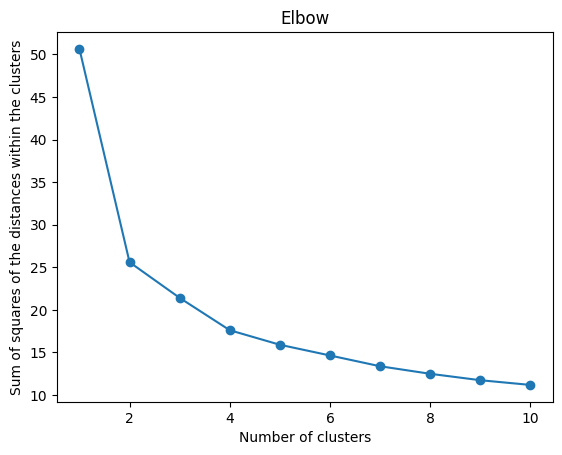

In [62]:
k_means_elbow(banknotes_df)


In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_score_kmeans(X):
    # X.reset_index(inplace=True)
    # X = X[X.columns[1:]].values
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        inertias.append(silhouette_score(X, labels))
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squares of the distances within the clusters')
    plt.title('Elbow')
    plt.show()


In [72]:
silhouette_score_kmeans(banknotes_df)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [65]:
from statsmodels.api import OLS

def aci(X):
    aic_values = []


    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        n = X.shape[0]
        p = k * X.shape[1]
        cluster_labels = np.unique(labels)
        cluster_sizes = np.bincount(labels)

        wcss = sum(np.sum((X[labels == label] - cluster_centers[label])**2)
                for label in cluster_labels)

        model = OLS(X, np.column_stack(
            [cluster_centers[label] for label in cluster_labels]))
        results = model.fit()
        log_likelihood = results.llf
        aic = 2 * p - 2 * log_likelihood

        aic_values.append(aic)

    best_index = np.argmin(aic_values)
    optimal_clusters = best_index + 2
    print("Optimal number of clusters:", optimal_clusters)


In [66]:
aci(banknotes_df)

ValueError: endog and exog matrices are different sizes